# Doing more with scatter plots

One thing you may notice is that you can do similar things with both the `plot()` and `scatter()` methods if you use `plot` and set the markers. Let's turn off the lines for `plot()` by setting the `linestyle` keyword argument to 'None' and set the marker to be a circle. For a full list of options for markers and what the look like, see this [page of the documentation](https://matplotlib.org/stable/api/markers_api.html).

In [46]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
x = np.linspace(0,2,21)
y = x**2
y[10]=3

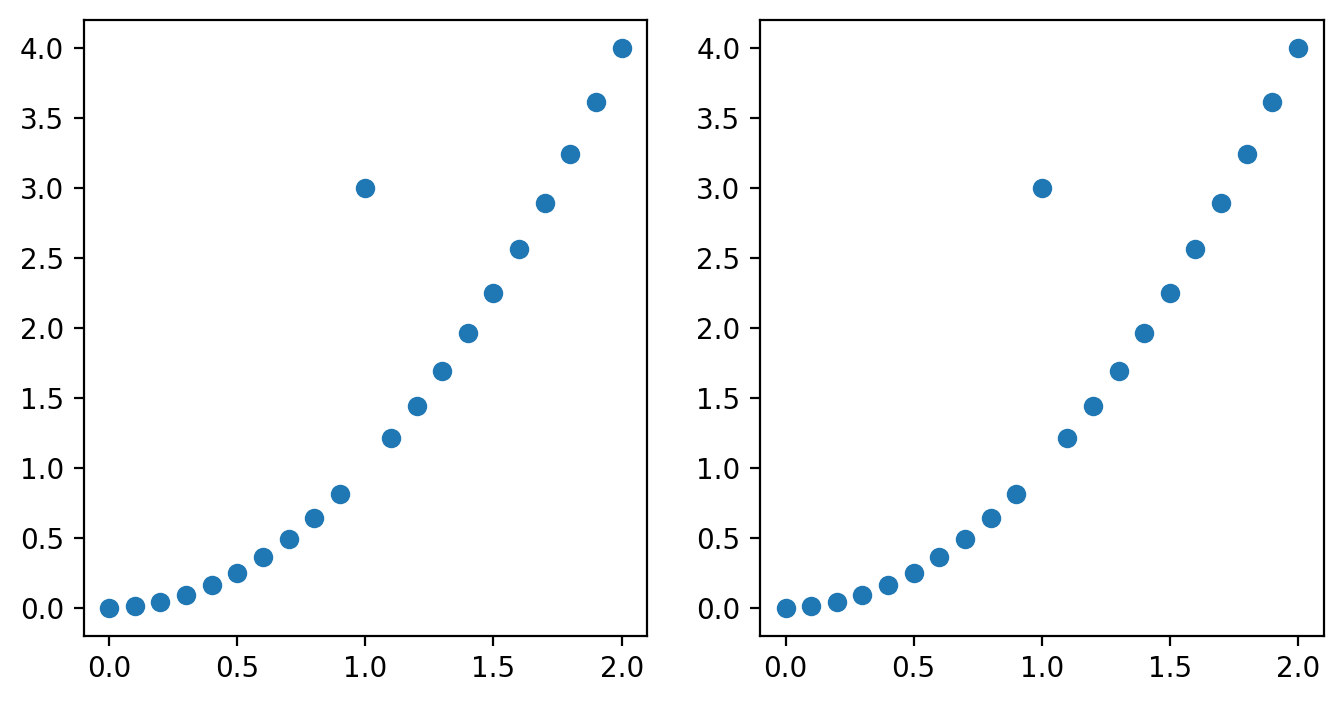

In [47]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(x,y)
axs[1].plot(x,y,marker='o',linestyle='None')

These look identical and so we might question why use the `scatter()` method at all? What the `scatter` method enables is for color of the marker and the size of the marker to be easily adjust with the data. This is also possible using `plot`, but takes more work. Let's see this in action: Let's set the color and the size of the circles to change along with the x value in the above plot. To do this we set the `c` and `s` keyword arguments of `scatter` which sets the color and size of the markers accordingly. Since out x values only go up to 2 and a marker size of 2 is very small, we multiply the sizes by 100 to see the full effect of the change in size:

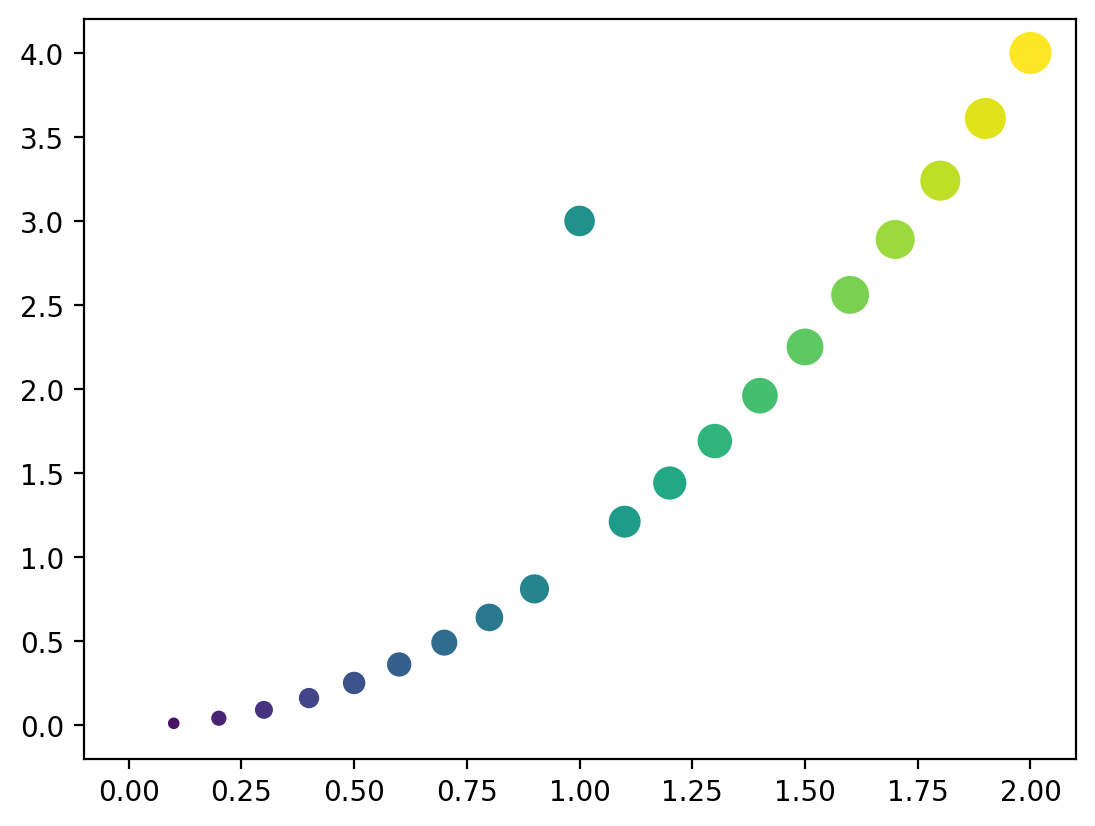

In [48]:
fig, ax = plt.subplots()
ax.scatter(x,y, c=x, s=x*100)

Here we can see that the colors and the size of the markers are changing with the x parameters. We can even add a colorbar:

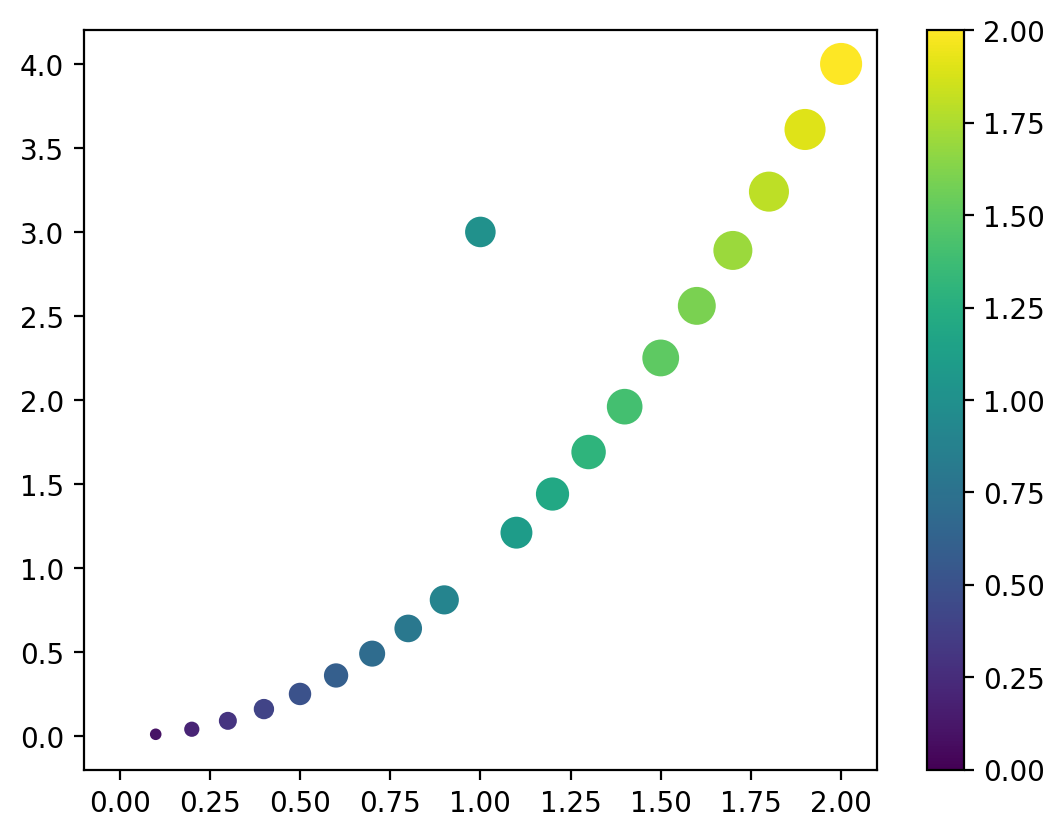

In [49]:
fig, ax = plt.subplots()
scatter = ax.scatter(x,y, c=x, s=x*100)
fig.colorbar(scatter, ax=ax)

Now, let's apply this to some real world data on statistics of various countries compiled from [GapMinder](https://www.gapminder.org/) data. Let's read our data in first.

In [50]:
import pandas as pd

data = pd.read_csv('data/gap-minder-statistics.csv')
data

,country,population,fertility,life_expectancy,average_daily_income
0,Afghanistan,42.20,3.65,64.0,3.10
1,Angola,36.70,5.21,65.9,4.63
2,Albania,2.83,1.70,77.3,16.90
3,UAE,9.52,1.65,74.6,82.90
4,Argentina,45.80,2.19,77.3,21.30
...,...,...,...,...,...
154,Vietnam,98.90,1.93,75.1,17.00
155,Yemen,34.40,3.37,67.2,2.16
156,South Africa,60.40,2.29,61.9,11.40
157,Zambia,20.60,4.60,63.4,2.94


Our data consists of five columns:
1. The country/region name
2. The population of that region in millions of people
3. The fertility rate in child per woman
4. Average life expectancy in years
5. Average daily income in inflation and price adjusted dollars per day

For most plot, being able to represent four separate quantities would be nearly impossible. However, with scatter plots we have two additional dimensions to work with: marker size and color. Let's use these to our advantage and make a scatter plot of life expectancy versus average daily income and set the size of the markers to be proportional to the population and the color to represent fertility rate.

Let's focus on the 15 largest countries by population for legibility as well:

In [51]:
largest = data.sort_values(by='population', ascending=False).iloc[:15]
largest

,country,population,fertility,life_expectancy,average_daily_income
25,China,1430.0,1.67,78.4,16.00
64,India,1430.0,2.18,71.9,5.49
151,USA,340.0,1.89,79.5,90.50
63,Indonesia,278.0,2.20,72.0,8.12
109,Pakistan,240.0,3.07,66.4,5.18
102,Nigeria,224.0,5.05,65.5,3.58
19,Brazil,216.0,1.65,76.7,20.10
13,Bangladesh,173.0,1.93,75.8,5.19
121,Russia,144.0,1.79,73.6,22.40
90,Mexico,128.0,1.99,76.5,15.20


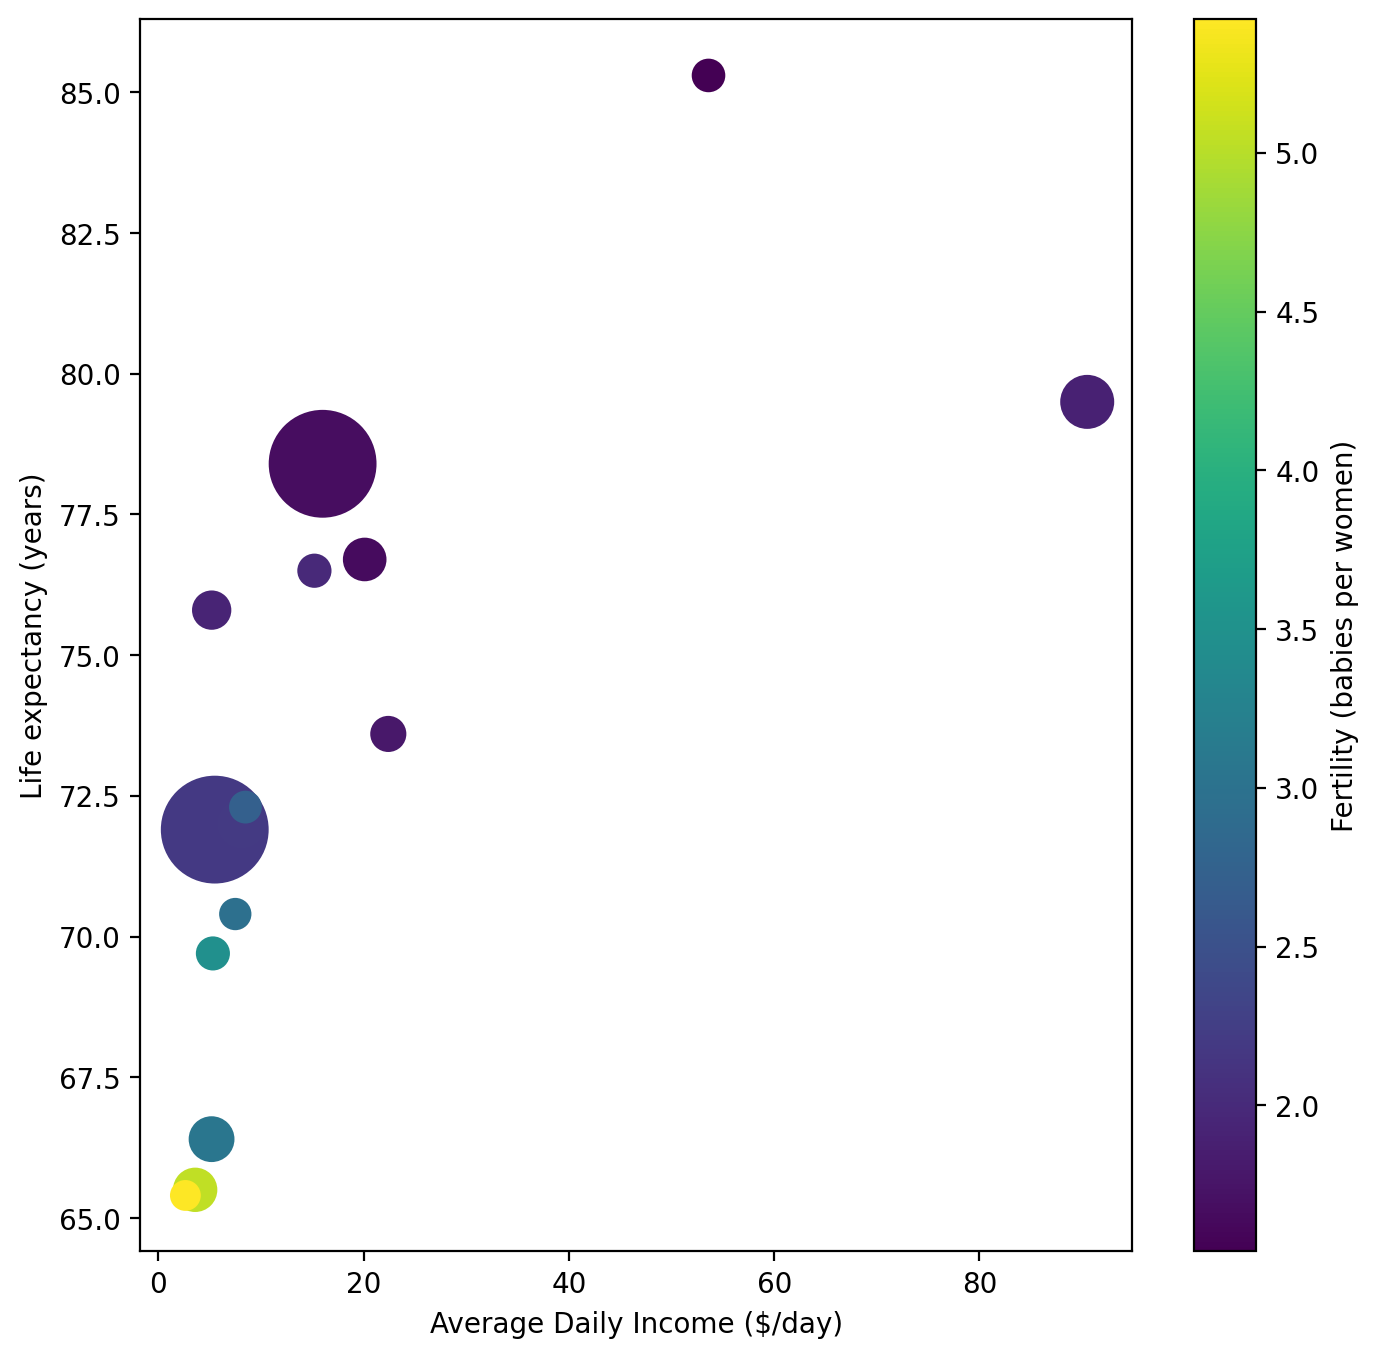

In [52]:
fig, ax = plt.subplots(figsize=(8,8)) # We'll also make the figure size a bit bigger to accommodate the additional data.

scatter = ax.scatter(largest['average_daily_income'],largest['life_expectancy'], 
                     c=largest['fertility'], 
                     s=largest['population'])
ax.set_xlabel('Average Daily Income ($/day)')
ax.set_ylabel('Life expectancy (years)')

fig.colorbar(scatter, ax=ax, label='Fertility (babies per women)')

Since the data is squished onto the left side of the plot, let's apply a log scale to the x values

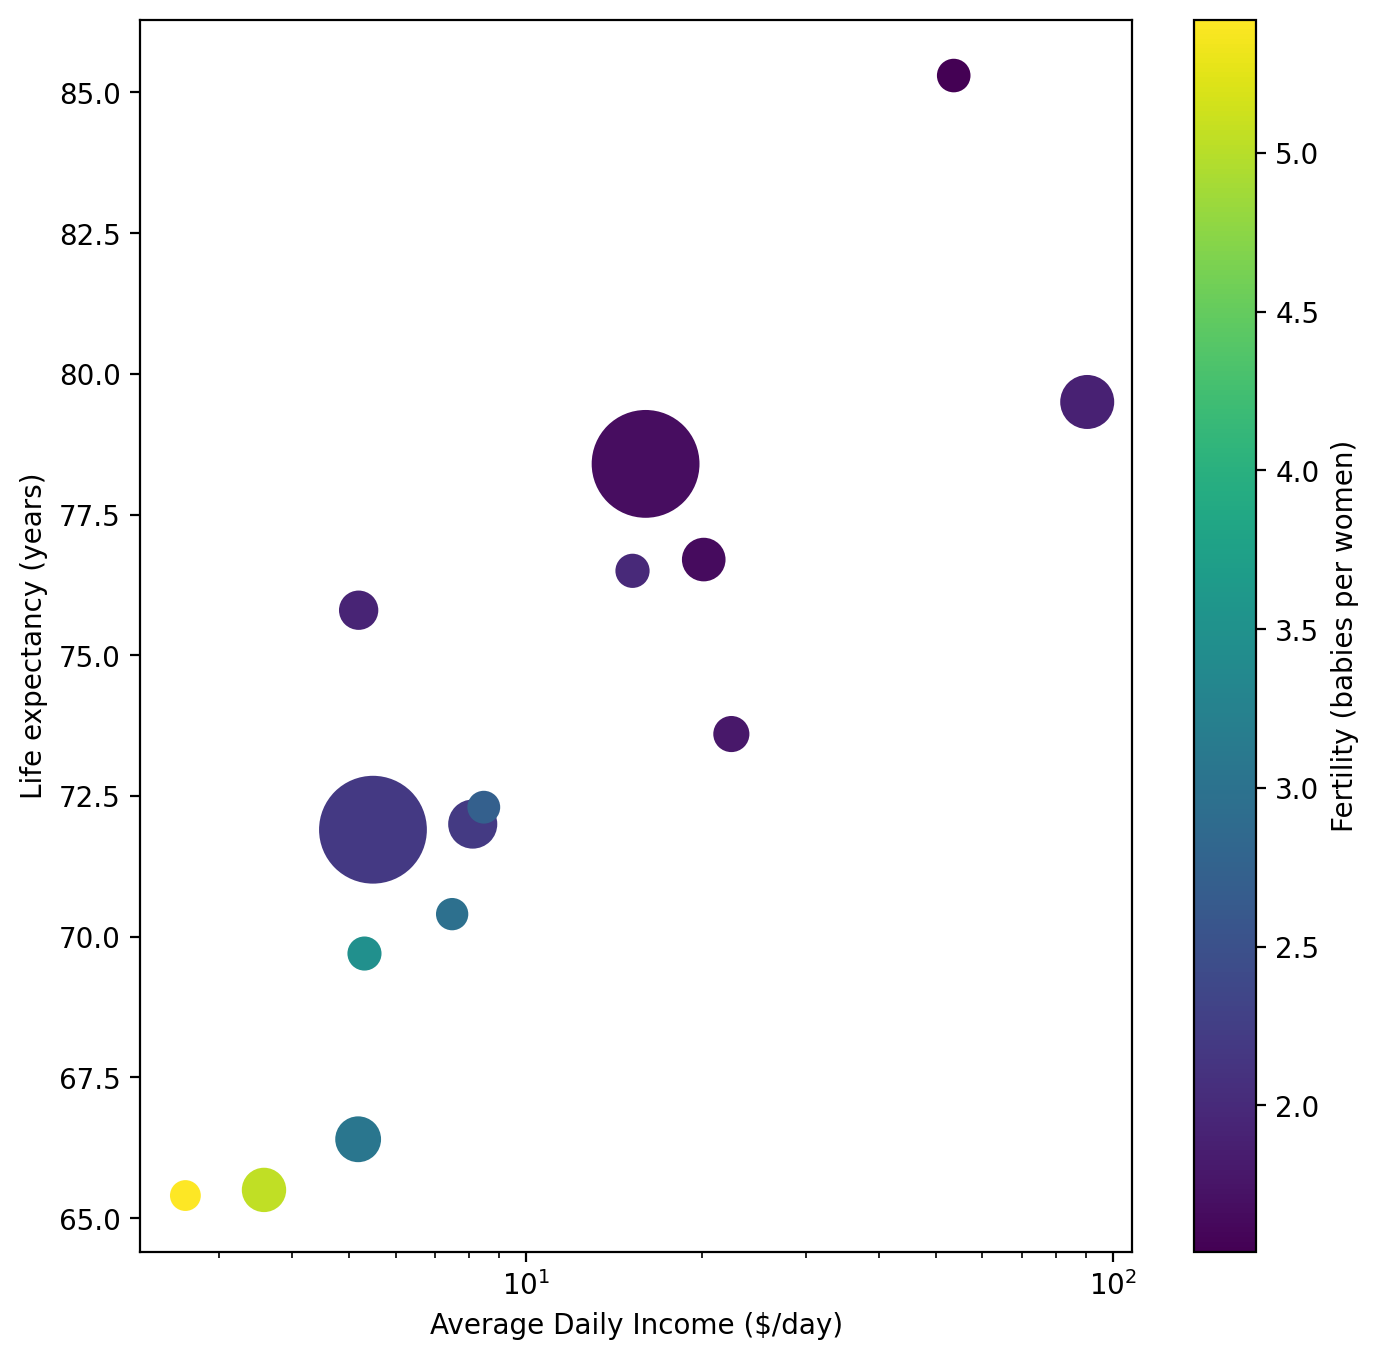

In [53]:
fig, ax = plt.subplots(figsize=(8,8)) # We'll also make the figure size a bit bigger to accommodate the additional data.

scatter = ax.scatter(largest['average_daily_income'],largest['life_expectancy'], 
                     c=largest['fertility'], 
                     s=largest['population'])
ax.set_xlabel('Average Daily Income ($/day)')
ax.set_ylabel('Life expectancy (years)')
ax.set_xscale('log')

fig.colorbar(scatter, ax=ax, label='Fertility (babies per women)')

This is looking much better! Of course, we still don't know which circle is which. Let's use what we learned with text plotting to enhance this plot by adding text labels for each of the names of the countries.

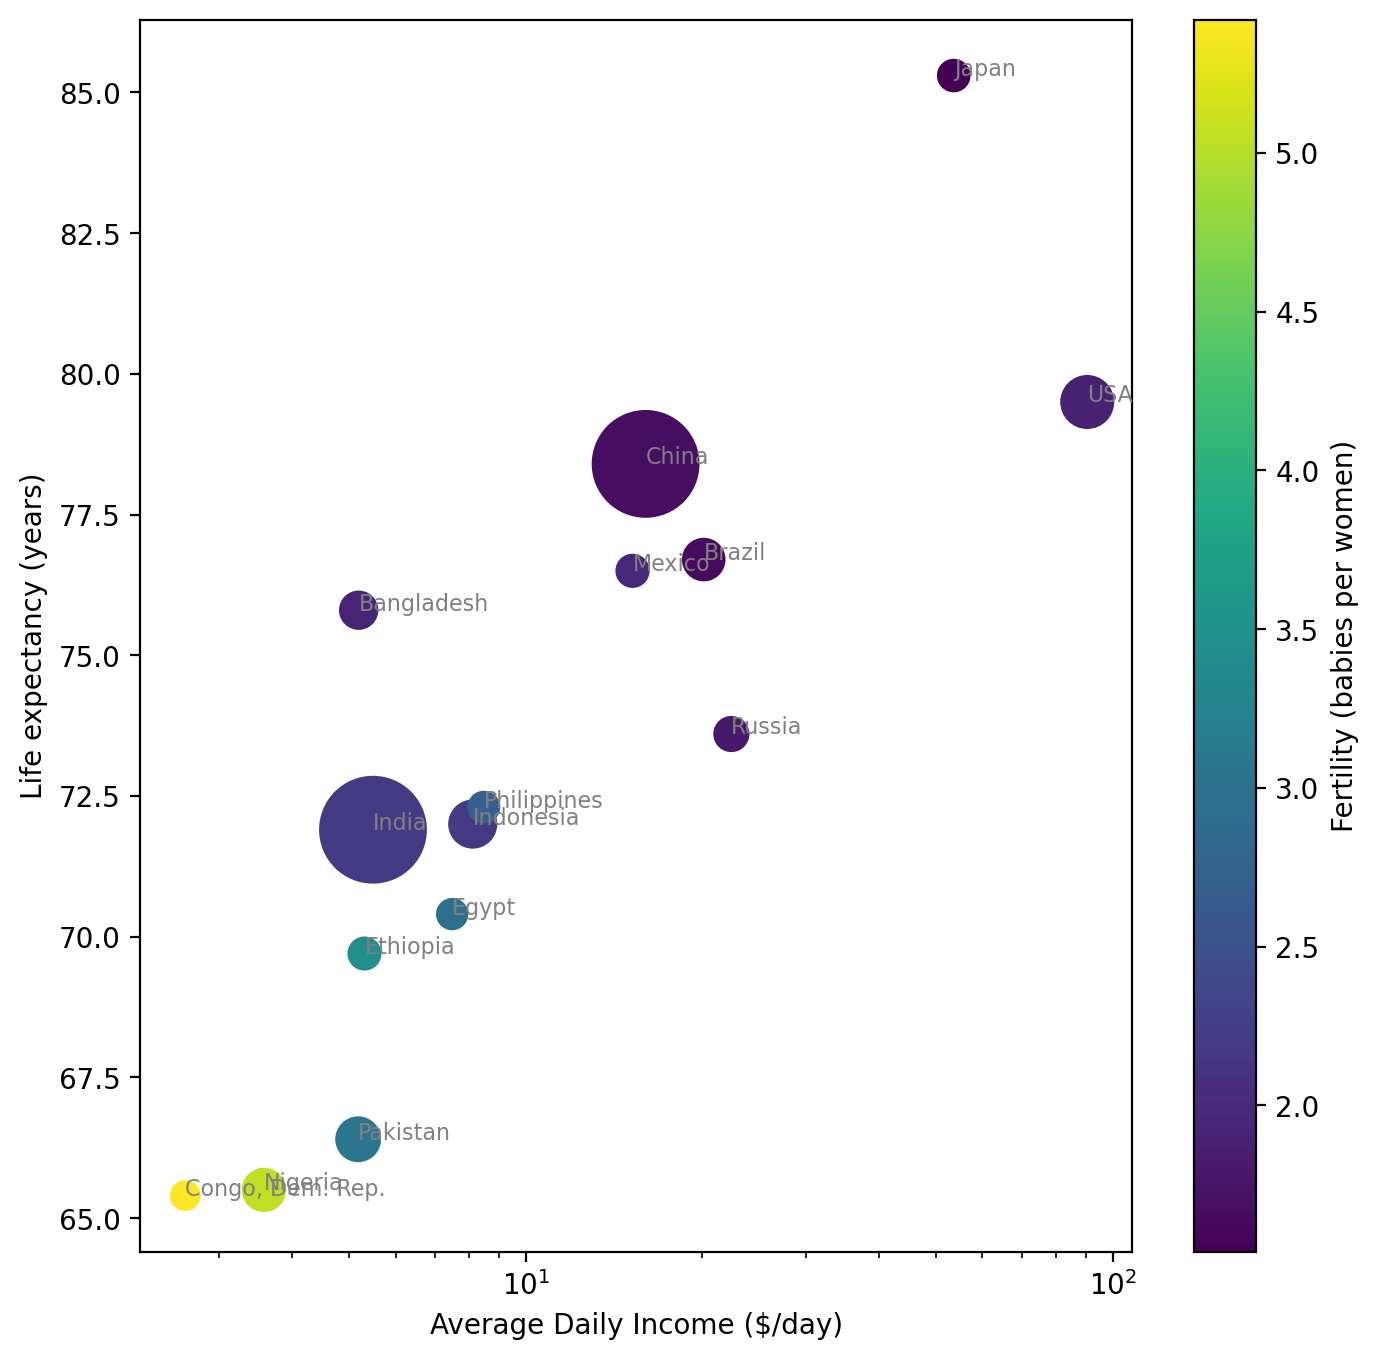

In [54]:
fig, ax = plt.subplots(figsize=(8,8)) # We'll also make the figure size a bit bigger to accommodate the additional data.

scatter = ax.scatter(largest['average_daily_income'],largest['life_expectancy'], 
                     c=largest['fertility'], 
                     s=largest['population'])
ax.set_xlabel('Average Daily Income ($/day)')
ax.set_ylabel('Life expectancy (years)')
ax.set_xscale('log')

fig.colorbar(scatter, ax=ax, label='Fertility (babies per women)')

for vx,vy,vs in zip(largest['average_daily_income'],largest['life_expectancy'],largest['country']):
    ax.text(vx,vy,vs, fontsize=8, color='gray')

Now this is a plot that clearly presents multiple characteristics in a coherent way. One additional enhancement could be a legend so we could tell the differences between marker size values more clearly, but we'll explore that later in a deep dive on legends.

At this point, though, we've created many types of plots. We typically want to package these in reports or presentations and to do so, we need to save our figures to file. Let's learn how to do that next!